In [59]:
import pandas as pd
import math
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from string import punctuation
import nltk
from mpl_toolkits.mplot3d import Axes3D
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [111]:
news_group="sci.space"

n_docs=40

categories = [news_group]

twenty_train = fetch_20newsgroups(subset='train',
        categories=categories,
        remove=('headers', 'footers', 'quotes'),
        shuffle=True)


stopwords = nltk.corpus.stopwords.words('english')
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

def strip_nums(s):
    return ''.join([i for i in s if not i.isdigit()])

all_docs=[nltk.tokenize.wordpunct_tokenize(strip_nums(strip_punctuation(twenty_train.data[i]).lower())) for i in range(n_docs)]


bow=[[i for i in all_docs[j] if i not in stopwords] for j in range(n_docs)]
len(bow)

bow=list(filter(None,bow))


In [124]:
def unique(bow):
    a = bow[0]
    for i in range(1,len(bow)):
        a = set(a).union(set(bow[i]))
    return a


wordset = unique(bow)
worddict = [dict.fromkeys(wordset,0) for i in range(len(bow))]


def term_document_matrix():
    
    for bow_i,worddict_i in zip(bow,worddict):
        for word in bow_i:
                    worddict_i[word]+=1
    return pd.DataFrame(worddict)


docterm = term_document_matrix()


def term_freq(worddict,bow):
    tfdict = {}
    bowcount = len(bow)
    for word,count in worddict.items():
        
        tfdict[word] = count/float(bowcount)
    return tfdict


tfbow =[term_freq(i,j) for i,j in zip(worddict,bow)]


def idf(doclist):
    idfdict={}
    n = len(doclist)
    
    idfdict = dict.fromkeys(doclist[0].keys(),0)
    for doc in doclist:
        for word,val in doc.items():
            if val>0:
                idfdict[word]+=1
    for word,val in idfdict.items():
        idfdict[word]=math.log(n/float(val))
    return idfdict


idfs = idf(worddict) 

def tfidf(tfbow,idfs):
    tfidf = {}
    for word,val in tfbow.items():
        tfidf[word]=val*idfs[word]
    return tfidf

tfidf = pd.DataFrame([tfidf(i,idfs) for i in tfbow])

X = pd.DataFrame(tfidf).T


## Document importance based on gow many unique words it contains : 

## This also gives an approximation of the length of the documents.

Document:27 has maximum number of the unique words


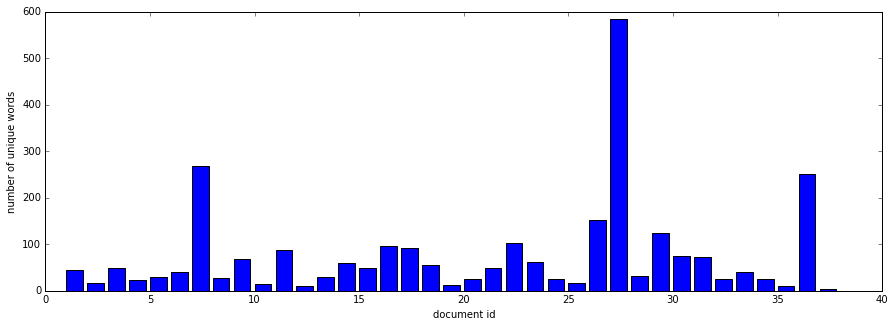

In [128]:

doclength = [docterm.shape[1]-list(doc[1]).count(0) for doc in docterm.iterrows()]
#plot(range(1,38),doclength)
plt.figure(figsize(15,5))
plt.bar(range(1,len(doclength)+1),doclength)
plt.xlabel("document id")
plt.ylabel("number of unique words")

print("Document:{} has maximum number of the unique words".format(np.argmax(doclength)+1))


## Distribution of word count  in all the documents

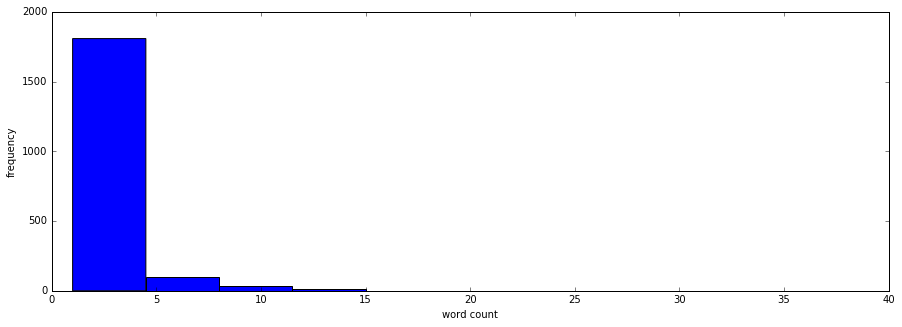

In [130]:
h = [docterm[word].sum() for word in  docterm.columns]
#bar(range(1,len(docterm.columns)),h)
hist(h)
plt.xlabel("word count")
plt.ylabel("frequency")


>Words mostly occurs 1-5 times in the corpus and very few words occur 10-15 times.

## Most popular words based on occurance.

In [115]:
d= zip(docterm.columns,h)
sorted(d,key=lambda x:x[1],reverse=True)

[('space', 36),
 ('astronaut', 28),
 ('nasa', 26),
 ('would', 21),
 ('mission', 19),
 ('one', 18),
 ('flight', 16),
 ('april', 14),
 ('candidates', 14),
 ('military', 14),
 ('system', 14),
 ('time', 14),
 ('aviation', 13),
 ('spacecraft', 13),
 ('also', 12),
 ('get', 12),
 ('pilot', 12),
 ('program', 12),
 ('shuttle', 12),
 ('cost', 11),
 ('must', 11),
 ('science', 11),
 ('test', 11),
 ('think', 11),
 ('applicants', 10),
 ('data', 10),
 ('degree', 10),
 ('earth', 10),
 ('may', 10),
 ('selection', 10),
 ('applications', 9),
 ('civilian', 9),
 ('degrees', 9),
 ('experience', 9),
 ('first', 9),
 ('launch', 9),
 ('like', 9),
 ('need', 9),
 ('new', 9),
 ('physical', 9),
 ('see', 9),
 ('support', 9),
 ('years', 9),
 ('astronauts', 8),
 ('candidate', 8),
 ('could', 8),
 ('know', 8),
 ('low', 8),
 ('moscow', 8),
 ('people', 8),
 ('requirements', 8),
 ('systems', 8),
 ('telemetry', 8),
 ('want', 8),
 ('application', 7),
 ('better', 7),
 ('date', 7),
 ('engineering', 7),
 ('enough', 7),
 ('heigh

# Words that are important based on the tfidf score. These are some of the unique words that determine a documents relevance or could be used to distinguish documents.

In [126]:
d= zip(tfidf.columns,h)
sorted(d,key=lambda x:x[1],reverse=True)

[('moments', 0.9027294781610561),
 ('srinivas', 0.9027294781610561),
 ('surreal', 0.9027294781610561),
 ('thanks', 0.8439370341410448),
 ('recent', 0.515845416092032),
 ('allen', 0.4606580952864572),
 ('could', 0.38914460243040633),
 ('rather', 0.3825521626510499),
 ('space', 0.3771718187517582),
 ('article', 0.37514195126797867),
 ('able', 0.3610917912644225),
 ('accept', 0.3610917912644225),
 ('donations', 0.3610917912644225),
 ('nonprofit', 0.3610917912644225),
 ('organisation', 0.3610917912644225),
 ('transferring', 0.3610917912644225),
 ('think', 0.34418138441413415),
 ('one', 0.34316988417885463),
 ('closer', 0.33310701803922),
 ('brains', 0.32826526478583856),
 ('pants', 0.32826526478583856),
 ('pointy', 0.32826526478583856),
 ('reusable', 0.32826526478583856),
 ('stick', 0.32826526478583856),
 ('tool', 0.32826526478583856),
 ('first', 0.3253718950963527),
 ('find', 0.32461844736676126),
 ('cost', 0.32448984966623934),
 ('would', 0.32366359354255514),
 ('operational', 0.32013853